<a href="https://colab.research.google.com/github/miladziekanowska/stock-market-forecast-project/blob/main/Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing libraries and fixing problems with Talib ;)**

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!sudo make install
os.chdir('../')
!pip install TA-Lib

In [ ]:
pip install Yahoo_fin


In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as yh
import talib as ta
import matplotlib.pyplot as plt
import pandas_datareader as web
import matplotlib.dates as mdates
pd.set_option('display.max_columns', 20)

In [ ]:
ticker_list = yh.tickers_dow()
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker] = yh.get_data(ticker, start_date="01/01/1993", end_date='now', index_as_date = True, interval="1d")

In [ ]:
historical_datas['AAPL']

**RSI**

In [34]:
historical_datas['AAPL']['RSI'] = ta.RSI(historical_datas['AAPL']['close'].tail(400))

In [ ]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['RSI'].tail(400), color='orange')

In [36]:
historical_datas['AAPL']['RSI_signal'] = 'HOLD'  # Inicjalizacja sygnałów na 'HOLD'

rsi_values = historical_datas['AAPL']['RSI']
rsi_signals = []

#Dopisanie sygnałów do kolumny RSI_signals
for rsi in rsi_values:
    if rsi < 30:
        rsi_signals.append('BUY')
    elif rsi > 70:
        rsi_signals.append('SELL')
    else:
        rsi_signals.append('HOLD')

historical_datas['AAPL']['RSI_signal'] = rsi_signals


In [ ]:
historical_datas['AAPL'].tail(30)

**MACD**

In [ ]:
historical_datas['AAPL']['MACD'], historical_datas['AAPL']['MACD_signalline'], macd_hist = ta.MACD(historical_datas['AAPL']['close'].tail(400))

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].plot(historical_datas['AAPL']['MACD'], 'b-')
axs[1].plot(historical_datas['AAPL']['MACD_signalline'], 'b-', color='red')
axs[1].bar(macd_hist.index, macd_hist, color=c)

In [ ]:
historical_datas['AAPL'].tail(50)

In [40]:

signals = []
position = 'HOLD'

for i in range(len(historical_datas['AAPL'])):
    if i == 0:
        signals.append(position)
    else:
        if historical_datas['AAPL']['MACD'][i] > historical_datas['AAPL']['MACD_signalline'][i] and historical_datas['AAPL']['MACD'][i - 1] <= historical_datas['AAPL']['MACD_signalline'][i - 1]:
            position = 'BUY'
        elif historical_datas['AAPL']['MACD'][i] < historical_datas['AAPL']['MACD_signalline'][i] and historical_datas['AAPL']['MACD'][i - 1] >= historical_datas['AAPL']['MACD_signalline'][i - 1]:
            position = 'SELL'
        else:
            position = 'HOLD'

        signals.append(position)

historical_datas['AAPL']['MACD_signal'] = signals


**Williams %R**

In [41]:
historical_datas['AAPL']['WillR'] = ta.WILLR(historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

In [ ]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=-80, color='r', linestyle='--')
axs[1].axhline(y=-20, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['WillR'].tail(200), color='orange')

In [43]:
historical_datas['AAPL']['WillR_signal'] = 'HOLD'

willr_values = historical_datas['AAPL']['WillR']
willr_signals = []


for willr in willr_values:
    if willr < -80:
        willr_signals.append('BUY')
    elif willr > -20:
        willr_signals.append('SELL')
    else:
        willr_signals.append('HOLD')

historical_datas['AAPL']['WillR_signal'] = willr_signals

In [ ]:
historical_datas['AAPL'].tail(50)

**CCI**

In [45]:
historical_datas['AAPL']['CCI'] = ta.CCI(historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

In [ ]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=200, color='r', linestyle='--')
axs[1].axhline(y=-200, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['CCI'].tail(200), color='orange')

In [47]:
historical_datas['AAPL']['CCI_signals'] = 'HOLD'

cci_values = historical_datas['AAPL']['CCI']
cci_signals = []


for cci in cci_values:
    if cci > 200 :
        cci_signals.append('BUY')
    elif cci < -200:
        cci_signals.append('SELL')
    else:
        cci_signals.append('HOLD')

historical_datas['AAPL']['CCI_signals'] = cci_signals

**BOP**

In [48]:
historical_datas['AAPL']['BOP'] = ta.BOP(historical_datas['AAPL']['open'], historical_datas['AAPL']['high'], historical_datas['AAPL']['low'], historical_datas['AAPL']['close'])

In [ ]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(200))
axs[1].axhline(y=0, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['BOP'].tail(200), color='orange')

In [50]:
historical_datas['AAPL']['BOP_signals'] = 'HOLD'

bop_values = historical_datas['AAPL']['BOP']
bop_signals = []


for bop in bop_values:
    if bop > 0 :
        bop_signals.append('BUY')
    elif bop < 0:
        bop_signals.append('SELL')
    else:
        bop_signals.append('HOLD')

historical_datas['AAPL']['BOP_signals'] = bop_signals

**Calculating all indicators in one function**

In [98]:
def calculate_signals_for_symbol(symbol):
    historical_data = yh.get_data(symbol, start_date="01/01/1993", end_date='now', index_as_date=True, interval="1d")

    historical_data['RSI'] = ta.RSI(historical_data['close'].tail(400))

    historical_data['RSI_signal'] = 'HOLD'
    rsi_signals = []

    for rsi in historical_data['RSI']:
        if rsi < 30:
            rsi_signals.append('BUY')
        elif rsi > 70:
            rsi_signals.append('SELL')
        else:
            rsi_signals.append('HOLD')

    historical_data['RSI_signal'] = rsi_signals

    historical_data['MACD'], historical_data['MACD_signalline'], macd_hist = ta.MACD(historical_data['close'].tail(400))
    signals = []
    position = 'HOLD'

    for i in range(len(historical_data)):
        if i == 0:
            signals.append(position)
        else:
            if historical_data['MACD'][i] > historical_data['MACD_signalline'][i] and historical_data['MACD'][i - 1] <= historical_data['MACD_signalline'][i - 1]:
                position = 'BUY'
            elif historical_data['MACD'][i] < historical_data['MACD_signalline'][i] and historical_data['MACD'][i - 1] >= historical_data['MACD_signalline'][i - 1]:
                position = 'SELL'
            else:
                position = 'HOLD'

            signals.append(position)

    historical_data['MACD_signal'] = signals
    historical_data['MACD_hist'] = macd_hist

    historical_data['WillR'] = ta.WILLR(historical_data['high'], historical_data['low'], historical_data['close'])
    historical_data['WillR_signal'] = 'HOLD'
    willr_signals = []

    for willr in historical_data['WillR']:
        if willr < -80:
            willr_signals.append('BUY')
        elif willr > -20:
            willr_signals.append('SELL')
        else:
            willr_signals.append('HOLD')

    historical_data['WillR_signal'] = willr_signals

    historical_data['CCI'] = ta.CCI(historical_data['high'], historical_data['low'], historical_data['close'])
    historical_data['CCI_signals'] = 'HOLD'
    cci_signals = []

    for cci in historical_data['CCI']:
        if cci > 200:
            cci_signals.append('BUY')
        elif cci < -200:
            cci_signals.append('SELL')
        else:
            cci_signals.append('HOLD')

    historical_data['CCI_signals'] = cci_signals

    historical_data['BOP'] = ta.BOP(historical_data['open'], historical_data['high'], historical_data['low'], historical_data['close'])
    historical_data['BOP_signals'] = 'HOLD'
    bop_signals = []

    for bop in historical_data['BOP']:
        if bop > 0:
            bop_signals.append('BUY')
        elif bop < 0:
            bop_signals.append('SELL')
        else:
            bop_signals.append('HOLD')

    historical_data['BOP_signals'] = bop_signals

    return historical_data

ticker_list = yh.tickers_dow()
historical_datas = {}

for ticker in ticker_list:
    historical_datas[ticker] = calculate_signals_for_symbol(ticker)

**Plot everything on one chart**

In [ ]:
def plot_indicator_charts(data):
    data = data.tail(200)

    fig, axs = plt.subplots(6, 1, gridspec_kw={"height_ratios":[3,1,3,3,3,3]}, figsize=(10, 18))

    axs[0].plot(data['close'])
    axs[0].set_title('Closing Price')

    axs[1].axhline(y=70, color='r', linestyle='--')
    axs[1].axhline(y=30, color='g', linestyle='--')
    axs[1].plot(data['RSI'], color='orange')
    axs[1].set_title('Relative Strength Index (RSI)')

    axs[2].plot(data['MACD'], 'b-')
    axs[2].plot(data['MACD_signalline'], 'b-', color='red')
    axs[2].bar(data.index, data['MACD_hist'], color=["red" if cl < 0 else "green" for cl in data['MACD_hist']])
    axs[2].set_title('Moving Average Convergence Divergence (MACD)')

    axs[3].axhline(y=-80, color='r', linestyle='--')
    axs[3].axhline(y=-20, color='g', linestyle='--')
    axs[3].plot(data['WillR'], color='orange')
    axs[3].set_title("Williams %R")

    axs[4].axhline(y=200, color='r', linestyle='--')
    axs[4].axhline(y=-200, color='g', linestyle='--')
    axs[4].plot(data['CCI'], color='orange')
    axs[4].set_title("Commodity Channel Index (CCI)")

    axs[5].axhline(y=0, color='g', linestyle='--')
    axs[5].plot(data['BOP'], color='orange')
    axs[5].set_title("Balance of Power (BOP)")

    plt.tight_layout()
    plt.show()


plot_indicator_charts(historical_datas[symbol])


In [105]:
historical_datas['MSFT']

,open,high,low,close,adjclose,volume,ticker,RSI,RSI_signal,MACD,MACD_signalline,MACD_signal,MACD_hist,WillR,WillR_signal,CCI,CCI_signals,BOP,BOP_signals
1993-01-04,2.656250,2.679688,2.640625,2.660156,1.652548,72646400,MSFT,NaN,HOLD,NaN,NaN,HOLD,NaN,NaN,HOLD,NaN,HOLD,0.099993,BUY
1993-01-05,2.656250,2.710938,2.648438,2.703125,1.679241,71529600,MSFT,NaN,HOLD,NaN,NaN,HOLD,NaN,NaN,HOLD,NaN,HOLD,0.750000,BUY
1993-01-06,2.718750,2.789063,2.710938,2.781250,1.727774,87440000,MSFT,NaN,HOLD,NaN,NaN,HOLD,NaN,NaN,HOLD,NaN,HOLD,0.800000,BUY
1993-01-07,2.781250,2.808594,2.718750,2.726563,1.693801,58748800,MSFT,NaN,HOLD,NaN,NaN,HOLD,NaN,NaN,HOLD,NaN,HOLD,-0.608689,SELL
1993-01-08,2.726563,2.757813,2.695313,2.722656,1.691374,43977600,MSFT,NaN,HOLD,NaN,NaN,HOLD,NaN,NaN,HOLD,NaN,HOLD,-0.062511,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,323.000000,325.089996,320.899994,321.859985,321.179962,16966300,MSFT,40.061215,HOLD,-4.288060,-2.718926,HOLD,-1.569135,-88.019916,BUY,-85.164346,HOLD,-0.272080,SELL
2023-08-16,320.799988,324.420013,319.799988,320.399994,320.399994,20698900,MSFT,38.882367,HOLD,-4.499693,-3.075079,HOLD,-1.424614,-94.278839,BUY,-88.198685,HOLD,-0.086578,SELL
2023-08-17,320.540009,321.869995,316.209991,316.880005,316.880005,21257200,MSFT,36.122507,HOLD,-4.895021,-3.439067,HOLD,-1.455953,-96.999494,BUY,-121.439831,HOLD,-0.646643,SELL
2023-08-18,314.489990,318.380005,311.549988,316.480011,316.480011,24744800,MSFT,35.811440,HOLD,-5.180875,-3.787429,HOLD,-1.393446,-81.733904,BUY,-148.161186,HOLD,0.291364,BUY


<ipython-input-101-3679fcc8c441>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[2].plot(data['MACD_signalline'], 'b-', color='red')


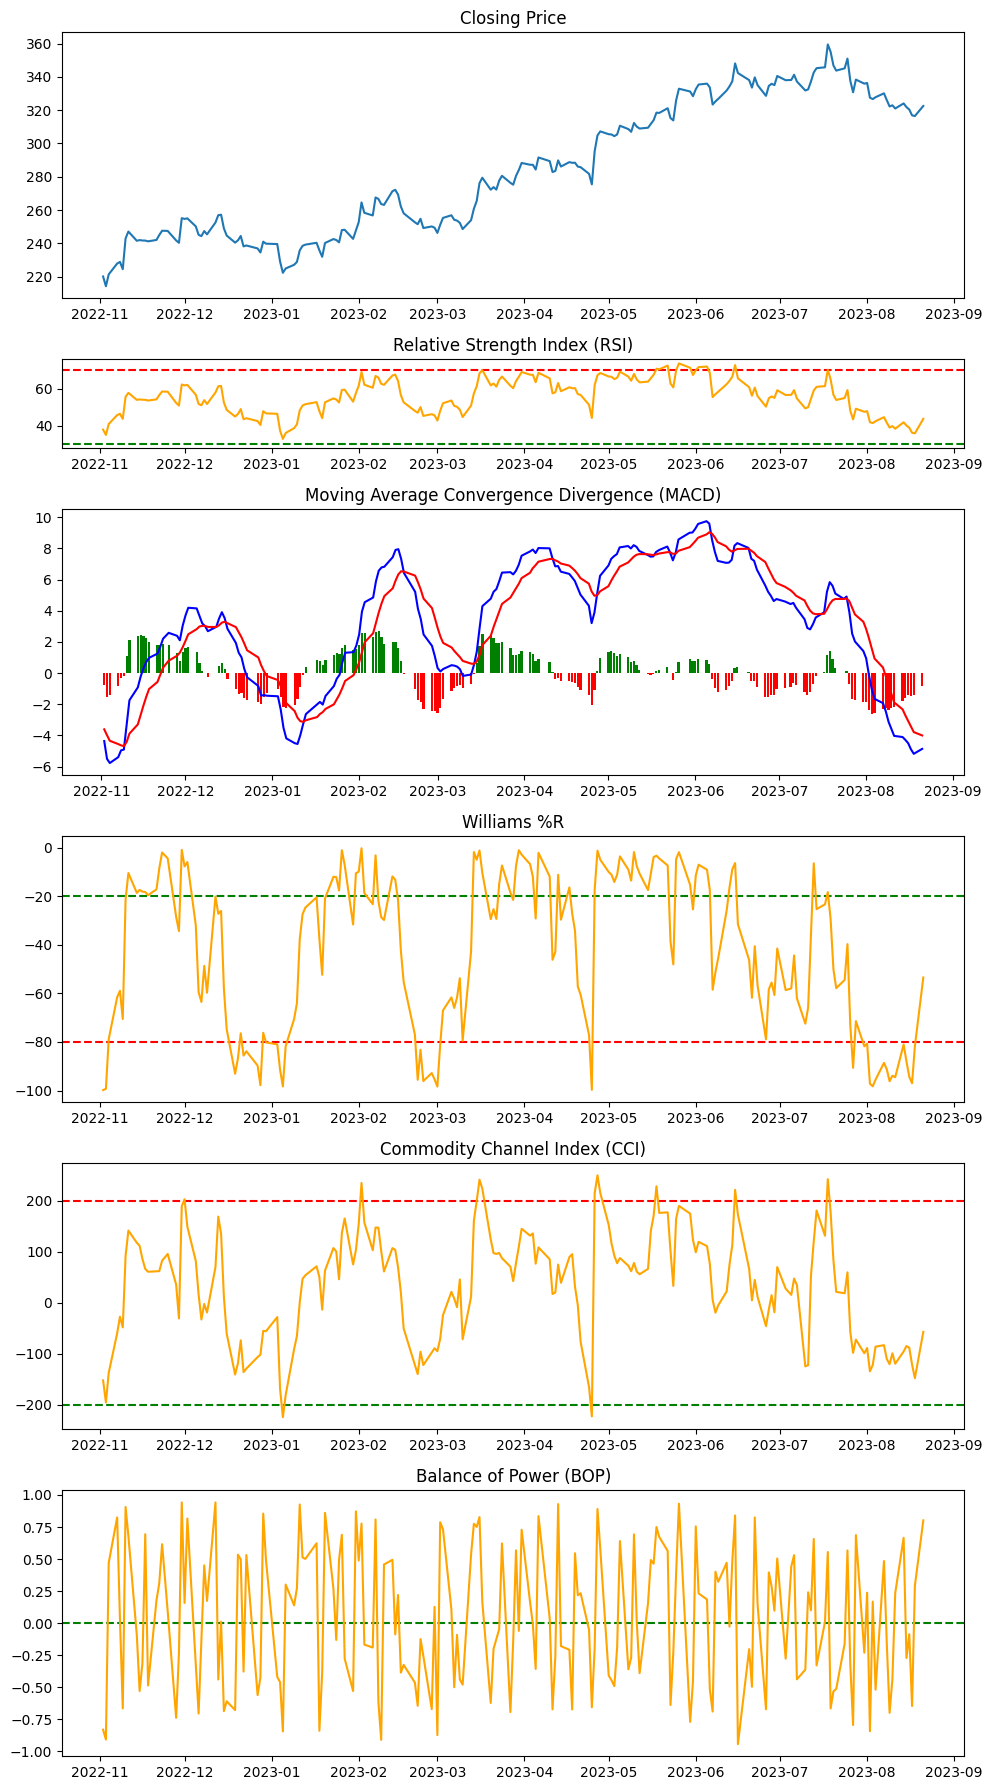

In [106]:
plot_indicator_charts(historical_datas['MSFT'])